Joined students and grades details:
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 91)
('Carol', 'White', 'English', 86)
('Carol', 'White', 'History', 97)
('David', 'Brown', 'Math', 99)
('David', 'Brown', 'English', 100)
('David', 'Brown', 'History', 98)
('Eve', 'Davis', 'Math', 72)
('Eve', 'Davis', 'English', 77)
('Eve', 'Davis', 'History', 79)
Average grade for each student:
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 91.33333333333333)
('David', 'Brown', 99.0)
('Eve', 'Davis', 76.0)
Student with the highest average grade: David Brown
Average grade for Math: 87.8
Students who scored above 90 in any subject:
('Alice', 'Johnson', 'Math', 95)
('Carol', 'White', 'Math', 91)
('Carol', 'White', 'History', 97)
('David', 'Brown', 'Math', 99)
('David', 'Brown', 'English', 100)
('David', 'Brown

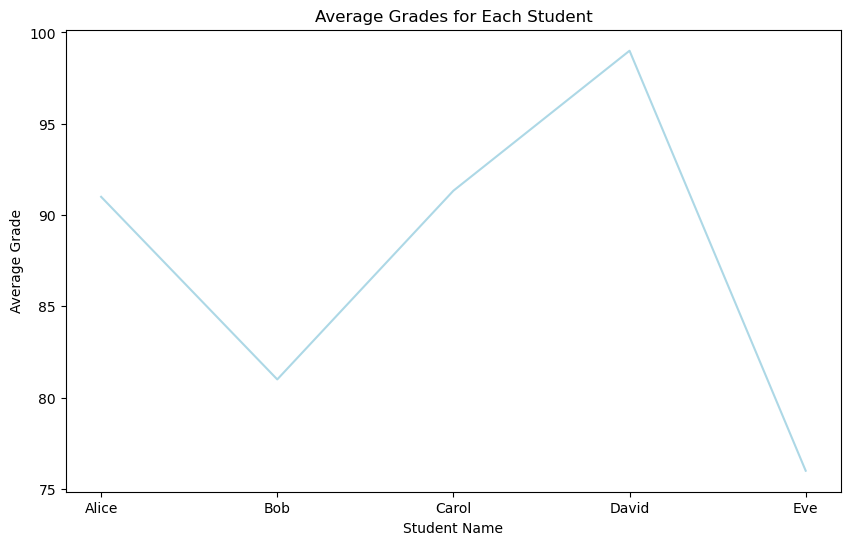

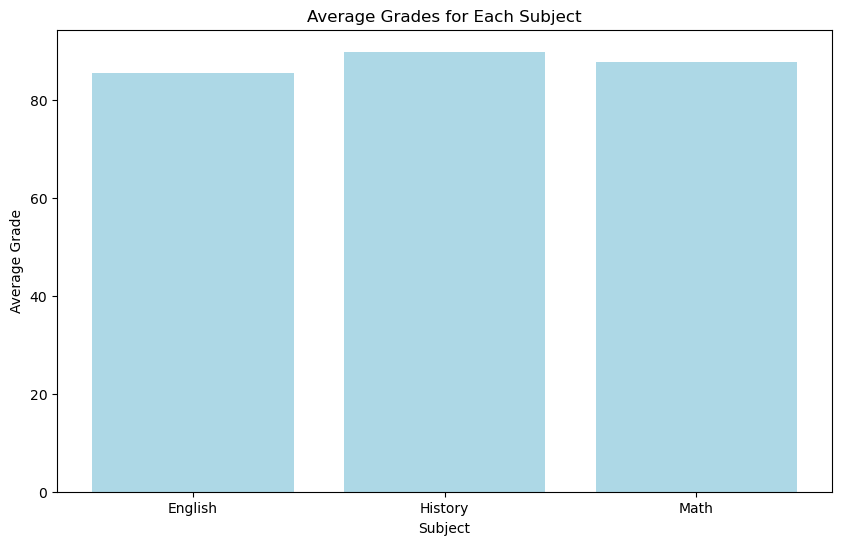

In [181]:
import sqlite3
connection = sqlite3.connect('student_grades.db')
cursor = connection.cursor()

# Students table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students(
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

# Grades table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades(
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT NOT NULL,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

# Insert data in students table
students_data = [
    (1, 'Alice', 'Johnson'),
    (2, 'Bob', 'Smith'),
    (3, 'Carol', 'White'),
    (4, 'David', 'Brown'),
    (5, 'Eve', 'Davis')
]

cursor.executemany('''
INSERT INTO students (student_id,first_name,last_name) VALUES (?,?,?)
''',students_data)

connection.commit()

# Insert data in grades table
grades_data = [
    (1,1,'Math',95),
    (2,1,'English',88),
    (3,1,'History',90),
    (4,2,'Math',82),
    (5,2,'English',76),
    (6,2,'History',85),
    (7,3,'Math',91),
    (8,3,'English',86),
    (9,3,'History',97),
    (10,4,'Math',99),
    (11,4,'English',100),
    (12,4,'History',98),
    (13,5,'Math',72),
    (14,5,'English',77),
    (15,5,'History',79)
]

cursor.executemany('''
INSERT INTO grades (grade_id,student_id,subject,grade) VALUES (?,?,?,?)
''',grades_data)
connection.commit()

# Retrieve all students' names and their grades.
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students 
JOIN grades ON students.student_id = grades.student_id
''')
joined_data = cursor.fetchall()
print("Joined students and grades details:")
for row in joined_data:
    print(row)

# Find the average grade for each student.
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')
joined_data2 = cursor.fetchall()
print("Average grade for each student:")
for row in joined_data2:
    print(row)

# Find the student with the highest average grade.
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
HAVING average_grade = (SELECT MAX(average_grade)
    FROM (SELECT AVG(grade) AS average_grade FROM grades GROUP BY student_id))
''')
highest_avg_student = cursor.fetchone()
print(f"Student with the highest average grade: {highest_avg_student[0]} {highest_avg_student[1]}")

# Find the average grade for the Math subject.
cursor.execute('''
SELECT AVG(grade) AS average_math_grade 
FROM grades WHERE subject='Math'
''')
average_math_grade = cursor.fetchone()
print(f"Average grade for Math: {average_math_grade[0]}")

# List all students who scored above 90 in any subject.
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade 
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
''')
students_above_90 = cursor.fetchall()
print("Students who scored above 90 in any subject:")
for student in students_above_90:
    print(student)

# Load data into pandas
import pandas as pd
df = pd.read_sql_query('SELECT * FROM students', connection)
df.head()
df = pd.read_sql_query('SELECT * FROM grades', connection)
df.head()

# Creating a single dataframe
joinquery = ('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students 
JOIN grades ON students.student_id = grades.student_id
''')
student_grades_df = pd.read_sql_query(joinquery, connection)
print("Combined DataFrame Students and Grades:")
print(student_grades_df)

# Plotting average grades for each student
import matplotlib.pyplot as plt
joinquery = ('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')
df = pd.read_sql_query(joinquery, connection)
plt.figure(figsize=(10,6))
plt.plot(df['first_name'],df['average_grade'],color='lightblue')
plt.xlabel('Student Name')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.show()

# Bar chart showing average age for each subject
joinquery2 = ('''
SELECT grades.subject, AVG(grades.grade) AS average_grade
FROM grades
GROUP BY grades.subject
''')
df = pd.read_sql_query(joinquery2, connection)
plt.figure(figsize=(10,6))
plt.bar(df['subject'],df['average_grade'],color='lightblue')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Subject')
plt.show()

cursor.close()
connection.close()